**Students:**


*   Conet Brieuc (1800)
*   Deside Guillaume (39731800)



#Projet 1 : Bayesian integration in force estimation
Authors : Simon Vandergooten and Clémence Vandamme.

In this first project you will have the opportunity to practice what you learned during the exercice sessions. More precisely, you will see how the Bayesian integration can be used in the specific case of force estimation. 


##Guidelines : 

1) Read the paper "*Bayesian integration in force estimation*" by K. Körding (2004), available on Moodle in the section "Project".

2) Download the datasets **F_true**, **F_pert** and **delta_y** available on Moodle and store them in the folder of your choice.

3) Run the provided cells (Section 1) to import the datasets in Colab.

4) Perform the same data analysis as the paper to reproduce **Figures 1D & 2(B $\rightarrow$ F)** and discuss your results.

5) Answer the following questions to check your understanding of the article.

* Why is prior knowledge important in general ? How does it help (or not) reducing the errors in this task ? 

* What is the research question and why is the task suitable to answer it ? 

* Explain with your own words how each graphs of figure 2A are obtained. In particular, explain why we expect a linear relationship between dF and F_true if we use full bayesian strategies ? What does the slope represent ? 


For this project, no report is needed. You will simply drop on moodle one notebook per group. This notebook will contain your entire code (we should be able to generate your figures by running the notebook), the figures, some comments on your methods and the answer of the open questions. The due date is the **28th of October at 23:59**. 

We will then review together your notebook during a small discussion (10 minutes). You will have the opportunity to explain us in more details what you have done. During this talk, we will also ask you some basic questions to check your understanding of the project. This is not a formal presentation, but it is mandatory.  



##Some indications

First, recall that the Bayes theorem states: 

$$Posterior \propto prior * likelihood$$

###About the data: 

After the article reading, take a moment to explore the data structure. The data you have access to are stored in a dictionary `Dict`. In this dictionary, you can then access all subjects (the first 6 subjects belong to group 1, the 5 last belong to group 2). Each subjects entry contains 3 numpy arrays: `F_true`, `F_pert` and `delta_y`. Those arrays are of size (3, 1400). Each line correspond to a day and is composed of the 7 blocks of 200 trials placed consecutively. 

Example: You can access the values of the perturbation force for the second subject with `Dict['Sujet 2']['F_pert']`. This will return an numpy array. 

*Click [here](https://docs.python.org/3/tutorial/datastructures.html) for more context about dictionary (See section 5.5)*.

* `F_true` is the true force the subjects experienced during the first pulse of a trial. As in the paper, it is drawn from two gaussian distributions that differ in their variance. Out of the 11 subjects, the first six experienced the wide distribution for the first two days then the narrow distribution during day 3. It is the opposite for the last five subjects.

* `F_pert` is a small perturbation added to the second pulse. It is also gaussian distributed. 

* `delta_y` is the positional error subjects made with respect to the target. 

* You can use $c = 0.68 [\frac{N}{cm}]$

Note that these data are not the experimental results of the article. Those are artificial data simulated by us, as we do not have access to the original dataset. Therefore, you will not recover the exact same graphs as the article, but you should obtain similar ones. 



#Section 1: Import datasets 


In [15]:
#import libraries
import numpy as np
import pandas as pd 
import io
import matplotlib.pyplot as plt

In [16]:
# @title Run to access and store the datasets
F_true = pd.read_csv("files/F_true.csv").to_numpy()[:,1:]
F_pert = pd.read_csv("files/F_pert.csv").to_numpy()[:,1:]
delta_y = pd.read_csv("files/delta_y.csv").to_numpy()[:,1:]

n_subjects = 11
n_days = 3
Dict = {}

for subject in range(n_subjects):
  Dict['Sujet ' + str(subject + 1)] = {'F_true':F_true[subject * n_days:(subject + 1) * n_days,:], 'F_pert':F_pert[subject * n_days:(subject + 1) * n_days,:], 'delta_y':delta_y[subject * n_days:(subject + 1) * n_days,:]}



You have now access to the dictionary **Dict**.




# Section 2: Your results

**Figure 1.D**

In [18]:
c_inverse = 100/68 #[cm/N]
C = 68/100 #[N/cm]

In [19]:
## Data treatment
### Sujet 1 - Day 0
x_f_pet = np.arange(-0.70,0.70,0.1)
print(len(x_f_pet))
y_mean_deltay = np.zeros(14)
y_std_deltay = np.zeros(14)
sujet_data_F = Dict['Sujet 1']['F_pert'][0]
sujet_data_Y = Dict['Sujet 1']['delta_y'][0]
for k in range(len(x_f_pet)):
  idx=np.where((sujet_data_F>= (x_f_pet[k]-0.05)) & ((x_f_pet[k]+0.05)>=sujet_data_F))
  y_std_deltay[k] =np.nanstd(sujet_data_Y[idx])/np.sqrt(len(sujet_data_Y[idx]))
  y_mean_deltay[k] =np.nanmean(sujet_data_Y[idx])
print(y_mean_deltay)

14
[-1.29966788 -0.57765799  0.420342   -0.49338035 -0.3043042  -0.10944949
 -0.10755716  0.19331727  0.30931376  0.40712578  0.66958265  0.71323356
  0.9831904   0.78623387]


In [20]:
F_pert_bis = F_pert.flatten()
delta_y_bis = delta_y.flatten()
y_mean_deltay_all = np.zeros(14)
y_std_deltay_all = np.zeros(14)
for k in range(len(x_f_pet)):
  idx = np.where((F_pert_bis>=(x_f_pet[k]-0.05))& (F_pert_bis<=(x_f_pet[k]+0.05)))
  y_mean_deltay_all[k] = np.nanmean(delta_y_bis[idx])
  y_std_deltay_all[k] = np.nanstd(delta_y_bis[idx])/np.sqrt(len(delta_y_bis[idx]))

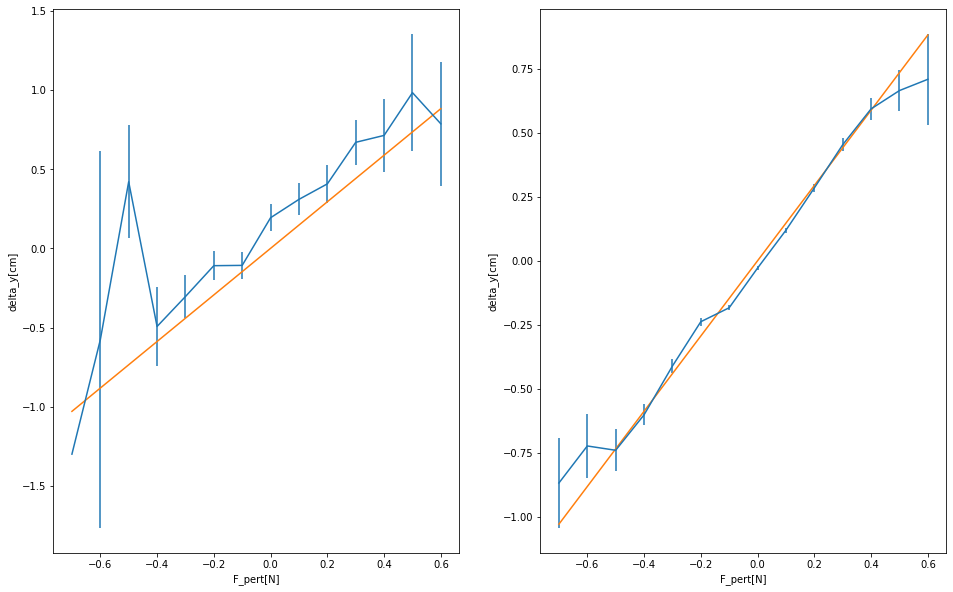

In [21]:
plt.figure(figsize=(16,10))
#plt.title("Figure 1.D")
plt.subplot(121)
plt.errorbar(x_f_pet,y_mean_deltay,yerr=y_std_deltay)
plt.plot(x_f_pet,c_inverse*x_f_pet)
#plt.ylim(-0.3,0.5,0.1)
#plt.xlim(-0.4,0.4,0.05)
plt.xlabel("F_pert[N]")
plt.ylabel("delta_y[cm]")
plt.subplot(122)
plt.errorbar(x_f_pet,y_mean_deltay_all,yerr=y_std_deltay_all)
plt.plot(x_f_pet,c_inverse*x_f_pet)
##plt.ylim(-0.3,0.5,0.1)
#plt.xlim(-0.4,0.4,0.05)
plt.xlabel("F_pert[N]")
plt.ylabel("delta_y[cm]")
plt.show()

**Figure 2.B**

**Figure 2.C**

In [22]:
#calculate F_estimated
F_estimated =  -(c*delta_y-F_pert-F_true)

In [26]:
#calculate Delta_F
delta_F = F_true-F_estimated
#print(delta_F)

In [27]:
for subject in range(n_subjects):
    Dict['Sujet ' + str(subject + 1)]['F_estimated'] = F_estimated[subject * n_days:(subject + 1) * n_days,:]
    Dict['Sujet ' + str(subject + 1)]['Delta_F'] = delta_F[subject * n_days:(subject + 1) * n_days,:]

In [32]:
day_one = np.zeros((11,1400))
for subject in range(n_subjects):
    day_one[subject]=(Dict['Sujet ' + str(subject + 1)]['Delta_F'][0])
day_one = day_one.flatten()
day_one

array([-3.66166458,  3.69458416,  3.94246539, ...,  1.89603926,
        1.57468424,  1.09148619])

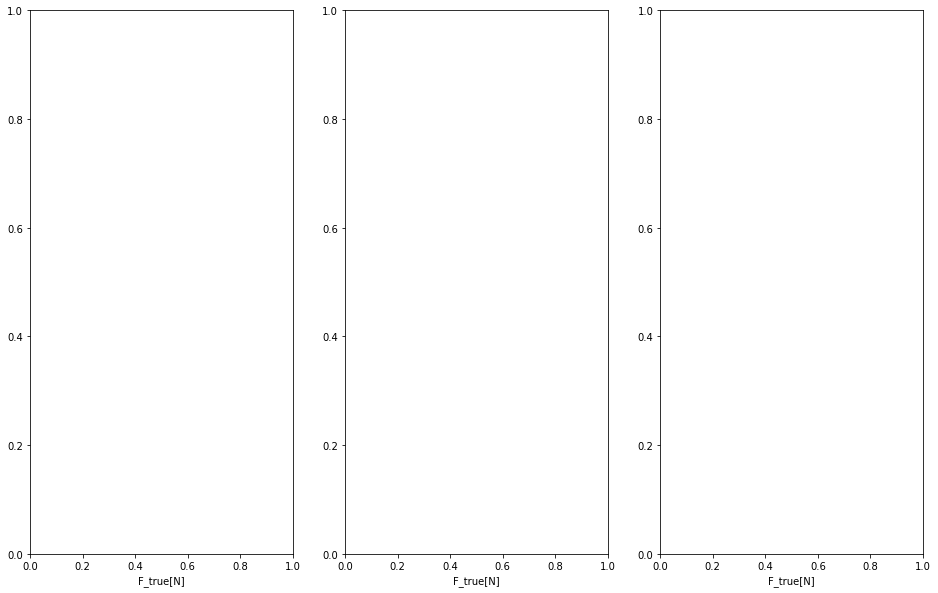

In [33]:
plt.figure(figsize=(16,10))
#plt.title("Figure 2.D")
plt.subplot(131)
plt.xlabel("F_true[N]")
plt.subplot(132)
plt.xlabel("F_true[N]")
plt.subplot(133)
plt.xlabel("F_true[N]")
plt.show()